# Folawiyo Campbell HW2 Solutions

In [1]:
from scipy.stats import skew, kurtosis

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
iris_data = sns.load_dataset("iris")

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_data.shape

(150, 5)

<h2> Question 1 <h2>

<h6> Test Statistics by Feature: <h6>
    In this section I calculate the test statistics and covariance for the whole data set. 

In [5]:
# Defines a t_mean which removes one value from the beginning and end by default.
def t_mean(col_name, start, end,  class_name = None, p = 1):
    if(class_name == None):
        return iris_data[col_name].sort_values(ascending=True)[start+p:end-p+1].mean()
    else:
        return iris_data[iris_data["species"] == class_name][col_name].sort_values(ascending=True)[start+p:end-p+1].mean()
 

In [6]:
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
class_names = ["setosa", "versicolor", "virginica"]

def test_statistics():
    data = {
            "mean": [], 
            "t_mean":[], 
            "min":[], 
            "max":[], 
            "standard_deviation":[], 
            "variance": [], 
            "skewness":[],
            "kurtosis":[]
           }
    for col in col_names:
        data["mean"].append(iris_data[col].mean())
        data["t_mean"].append(t_mean(col, 0, 150))
        data["min"].append(iris_data[col].min())
        data["max"].append(iris_data[col].max())
        data["standard_deviation"].append(iris_data[col].std())
        data["variance"].append(iris_data[col].var())
        data["skewness"].append(skew(iris_data[col]))
        data["kurtosis"].append(kurtosis(iris_data[col], fisher = False))
        
    return pd.DataFrame(data,
                        index =[col_names])

In [7]:
test_statistics()

,mean,t_mean,min,max,standard_deviation,variance,skewness,kurtosis
sepal_length,5.843333,5.853691,4.3,7.9,0.828066,0.685694,0.311753,2.426432
sepal_width,3.057333,3.064430,2.0,4.4,0.435866,0.189979,0.315767,3.180976
petal_length,3.758000,3.776510,1.0,6.9,1.765298,3.116278,-0.272128,1.604464
petal_width,1.199333,1.206711,0.1,2.5,0.762238,0.581006,-0.101934,1.663933


In [8]:

iris_data.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


   <h6> Test Statistics by class and feature: <h6>
    In this section I calculate the test statistics and covariance for each class in the dataset.

In [9]:
def test_statistics_by_class():
    data = {
            "mean": [], 
            "t_mean":[], 
            "min":[], 
            "max":[], 
            "standard_deviation":[], 
            "variance": [], 
            "skewness":[],
            "kurtosis":[]
           }
    for class_name in class_names:
        for col in col_names:
            data["mean"].append(iris_data[iris_data["species"] == class_name][col].mean())
            data["t_mean"].append(t_mean(col, 0, 150, class_name))
            data["min"].append(iris_data[iris_data["species"] == class_name][col].min())
            data["max"].append(iris_data[iris_data["species"] == class_name][col].max())
            data["standard_deviation"].append(iris_data[iris_data["species"] == class_name][col].std())
            data["variance"].append(iris_data[iris_data["species"] == class_name][col].var())
            data["skewness"].append(skew(iris_data[iris_data["species"] == class_name][col]))
            data["kurtosis"].append(kurtosis(iris_data[iris_data["species"] == class_name][col], fisher = False))
      
    classes = []
    columns = []
    for class_name in class_names:
        for col in col_names:
            classes.append(class_name)
            columns.append(col)
    
    return pd.DataFrame(data,
                        index =[classes, columns])

In [10]:
test_statistics_by_class()

mean    t_mean  min  max  standard_deviation  \
setosa     sepal_length  5.006  5.020408  4.3  5.8            0.352490   
           sepal_width   3.428  3.451020  2.3  4.4            0.379064   
           petal_length  1.462  1.471429  1.0  1.9            0.173664   
           petal_width   0.246  0.248980  0.1  0.6            0.105386   
versicolor sepal_length  5.936  5.957143  4.9  7.0            0.516171   
           sepal_width   2.770  2.785714  2.0  3.4            0.313798   
           petal_length  4.260  4.285714  3.0  5.1            0.469911   
           petal_width   1.326  1.332653  1.0  1.8            0.197753   
virginica  sepal_length  6.588  6.622449  4.9  7.9            0.635880   
           sepal_width   2.974  2.989796  2.2  3.8            0.322497   
           petal_length  5.552  5.573469  4.5  6.9            0.551895   
           petal_width   2.026  2.038776  1.4  2.5            0.274650   

                         variance  skewness  kurtosis  
setosa     sepal_length  0.124249  0.116454  2.654235  
           sepal_width   0.143690  0.039921  3.744222  
           petal_length  0.030159  0.103175  3.804592  
           petal_width   0.011106  1.215928  4.434317  
versicolor sepal_length  0.266433  0.102190  2.401173  
           sepal_width   0.098469 -0.351867  2.551728  
           petal_length  0.220816 -0.588159  2.925598  
           petal_width   0.039106 -0.030236  2.512167  
virginica  sepal_length  0.404343  0.114445  2.912058  
           sepal_width   0.104004  0.354878  3.519766  
           petal_length  0.304588  0.532822  2.743528  
           petal_width   0.075433 -0.125560  2.338652

In [11]:
iris_data[iris_data["species"] == "setosa"].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.124249,0.099216,0.016355,0.010331
sepal_width,0.099216,0.143690,0.011698,0.009298
petal_length,0.016355,0.011698,0.030159,0.006069
petal_width,0.010331,0.009298,0.006069,0.011106


In [12]:
iris_data[iris_data["species"] == "versicolor"].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.266433,0.085184,0.182898,0.055780
sepal_width,0.085184,0.098469,0.082653,0.041204
petal_length,0.182898,0.082653,0.220816,0.073102
petal_width,0.055780,0.041204,0.073102,0.039106


In [13]:
iris_data[iris_data["species"] == "virginica"].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.404343,0.093763,0.303290,0.049094
sepal_width,0.093763,0.104004,0.071380,0.047629
petal_length,0.303290,0.071380,0.304588,0.048824
petal_width,0.049094,0.047629,0.048824,0.075433


<h2> Question 2 </h2>

In [270]:
from random import randrange
def generate(class_name):
    original = iris_data[iris_data["species"] == class_name]
    original = original.drop("species", axis = 1)
    mean = original.mean().to_numpy()
    min = original.min().to_numpy()
    max = original.max().to_numpy()
    covarience_matrix = original.cov().to_numpy()
    
    generated = []
    for i in range(100):
        generated.append(
            min_max_normalization([randrange(4, 100), randrange(4, 100), randrange(4, 101), randrange(4, 101),
        ], min, max))
    generated = np.array(generated)
    final = np.dot(generated, covarience_matrix)
    return min_max_normalization(np.array(final), min, max)
    

def min_max_normalization(val, min, max):
    val = np.array(val)
    return ((val - np.amin(val, axis = 0))/(np.amax(val, axis = 0) - np.amin(val, axis = 0)))*(max - min) + min
    

In [277]:
def generate_and_plot(class_name):
    synthetic = generate(class_name)
    df_original = pd.DataFrame(data = iris_data[iris_data["species"] == class_name],
                           columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
    df_original["original_or_synthetic"]="original"
    df_synthetic =  pd.DataFrame(data = synthetic ,
                           columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
    df_synthetic["original_or_synthetic"]="synthetic"
    frames = [df_original, df_synthetic]
    result = pd.concat(frames)
    sns.relplot(
    data=result,
    x="sepal_width", y="petal_length",
    hue="original_or_synthetic", style="original_or_synthetic")

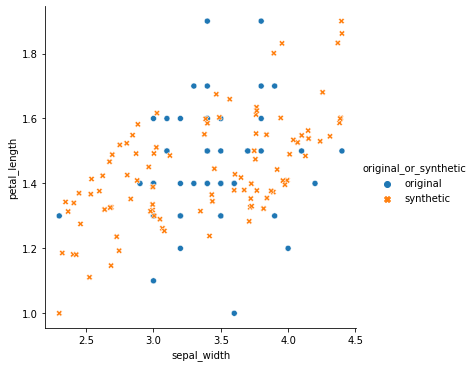

In [278]:
generate_and_plot("setosa")

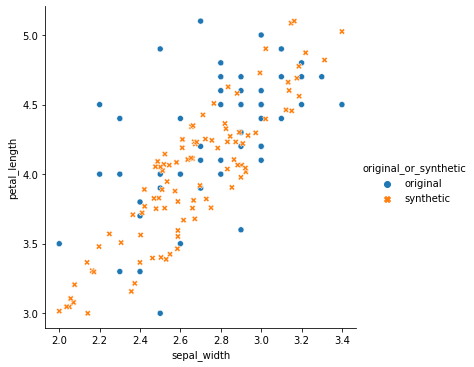

In [279]:
generate_and_plot("versicolor")

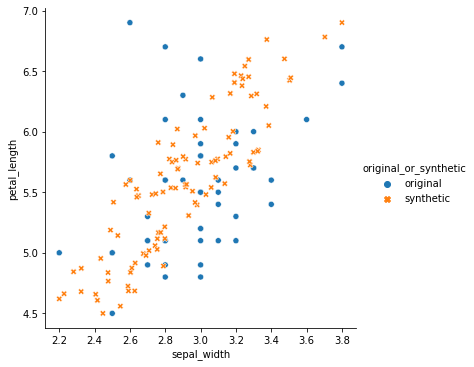

In [280]:
generate_and_plot("virginica")

<h2> Question 3 </h2>

<p> Part (a) read the data from the csv file </p>

In [14]:
digits_train = pd.read_csv("data/train.csv")
features_train = digits_train.drop("label", axis = 1)
labels_train = digits_train["label"]
digits_train.shape

(42000, 785)

In [15]:
features_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
labels_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<p>Part (b) reshape the data.</p>

In [17]:
reshaped = features_train.values.reshape(-1, 28, 28)

TODO!!!
<p> Part (c) running time is:    <p>

<p> Part (d)<p>

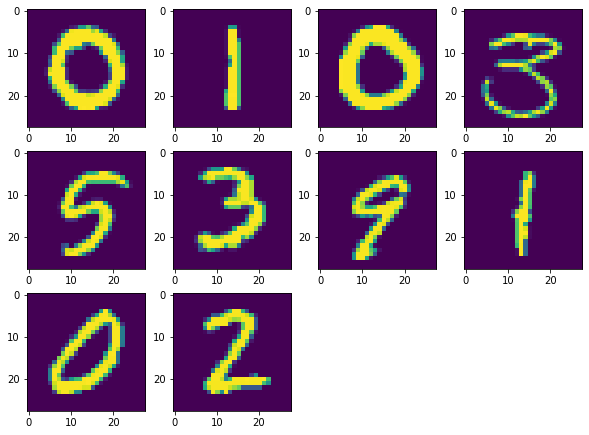

In [18]:
# Let's plot the data to see if our reshape makes sense.
plt.figure(figsize=(10, 10))

indices_of_interest = [1, 2, 4, 7, 8, 9, 11, 12, 17, 22];
for i in range(len(indices_of_interest)):  
    plt.subplot(4, 4, i+1)
    plt.imshow(reshaped[indices_of_interest[i]][:,:])

<h2>Question 4</h2>

Part (a) Take a dct of each image 28 x 28 matrix.

In [19]:
from scipy.fftpack import dct, idct

# Implementation of 2D dct and inverser in python.
# Reference: https://stackoverflow.com/questions/40104377/issiue-with-implementation-of-2d-discrete-cosine-transform-in-python
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

In [20]:
test = dct2(np.array([[1,2,3,4,5,6,7,8],[9,10, 11, 12, 13, 14, 15, 16]]))

In [21]:
idct2(test)

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16.]])

In [22]:
reshaped[0:100,:,:].shape

(100, 28, 28)

In [42]:
dct_transforms = []
for image in reshaped:
    transform = dct2(image).astype(np.float32)
    dct_transforms.append(transform)

In [43]:
# Get the inverse transform to be able to observe the transformed image
check = idct2(dct_transforms[1])
check

array([[-1.90187109e-07,  5.97173948e-06,  1.08769427e-05,
         8.93998549e-06,  4.03353442e-06,  1.76412595e-06,
        -3.63865229e-06, -8.55655162e-06, -6.19615639e-06,
         4.52339191e-06,  7.22167806e-06,  1.09464763e-05,
         7.59964269e-06,  6.23465985e-06,  8.87361466e-07,
         2.11509405e-06,  7.62181162e-06,  4.46892454e-06,
        -3.88546596e-07, -4.87149373e-06, -3.95080679e-06,
        -2.91641345e-06,  3.54452027e-07,  4.46861031e-06,
         7.27839233e-06,  1.06545485e-05,  5.23635390e-06,
         4.33029356e-07],
       [ 4.43450517e-06,  1.14516729e-06, -6.59250475e-07,
        -7.01258159e-06, -9.96067774e-06, -1.91201116e-06,
         7.21174729e-08,  2.42507599e-06,  1.35766641e-06,
        -1.06189755e-05, -6.09113613e-06, -2.89002458e-07,
         1.85336125e-06,  8.87619353e-06,  8.21196954e-06,
         4.48372839e-06, -5.04122136e-06, -9.24185952e-06,
        -1.24528979e-05, -5.53752034e-06,  1.01362343e-06,
         1.59372837e-06,  2.30

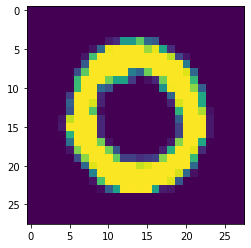

In [44]:
# Original
plt.imshow(reshaped[1])

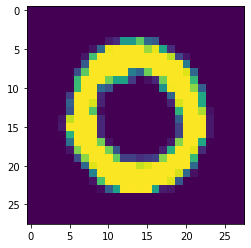

In [45]:
# Transformed
plt.imshow(check)

Part (b) Extracting the first row, first column and diagonal of my dct_transforms

In [46]:
extracted = []
for transform in dct_transforms:
    extracted.append([transform[0,:], transform[:,0], np.diag(transform)])

In [47]:
extracted = np.array(extracted)

Part (c) Calculating the mean, standard deviation, skewness and kurtosis of the extraced parts of the DCT.

In [48]:
statistics = []
for extraction in extracted:
    statistics.append([
        extraction[0].mean(), extraction[0].std(), skew(extraction[0]), kurtosis(extraction[0], fisher=False), # first row
        extraction[1].mean(), extraction[1].std(), skew(extraction[1]), kurtosis(extraction[1], fisher=False), # first column
        extraction[2].mean(), extraction[2].std(), skew(extraction[2]), kurtosis(extraction[2], fisher=False)  # diagonal
    ])

In [49]:
statistics = np.array(statistics)

In [50]:
statistics.shape

(42000, 12)

In [51]:
# combine statistic (new features) with labels to have a view of the dataset
new_data = pd.DataFrame(data = statistics, columns = ["row_mean", "row_std", "row_skewness", "row_kurtosis",
                                                      "col_mean", "col_std", "col_skewness", "col_kurtosis",
                                                      "diagonal_mean", "diagonal_std", "diagonal_skewness", "diagonal_kurtosis"
                                                    ])
new_data['label'] = labels_train
new_data.head()

,row_mean,row_std,row_skewness,row_kurtosis,col_mean,col_std,col_skewness,col_kurtosis,diagonal_mean,diagonal_std,diagonal_skewness,diagonal_kurtosis,label
0,6.551834,158.088379,0.333687,12.172711,7.311980,134.323792,2.357860,14.558069,18.928574,211.264404,0.569410,5.076803,1
1,18.216541,387.203949,1.635431,11.795582,16.791946,371.806366,2.087387,12.950486,47.392853,332.064117,3.392073,17.360015,0
2,3.538593,266.115814,-0.127073,4.159218,5.113597,109.391220,2.329812,13.861288,20.857143,117.884705,2.493724,10.743184,1
3,6.839959,166.778259,0.741613,5.932000,4.363030,138.733475,1.361618,9.727811,40.071430,110.733200,3.484258,15.069868,4
4,16.666342,427.120636,2.076301,12.842092,21.234127,417.573761,2.281744,13.695898,46.178570,362.916931,4.103410,20.790625,0


In [52]:
sorted_by_labels = new_data.sort_values(by = ['label'])
sorted_by_labels[sorted_by_labels['label']== 8]

,row_mean,row_std,row_skewness,row_kurtosis,col_mean,col_std,col_skewness,col_kurtosis,diagonal_mean,diagonal_std,diagonal_skewness,diagonal_kurtosis,label
37514,11.822289,306.204803,-0.089331,11.934549,13.186708,257.943878,2.335502,12.096686,31.892857,249.227371,2.803514,12.669909,8
2161,9.367723,272.128448,-0.263553,11.096366,9.799158,217.963654,2.344265,12.527203,85.892845,200.923279,2.951288,12.111199,8
1299,13.063658,310.035980,2.359751,13.300883,14.104596,328.153778,2.102982,10.622046,43.464291,256.540802,4.632280,23.714827,8
39722,9.919624,291.359619,-0.219055,9.835463,11.155887,231.541916,1.989076,12.645964,47.000000,221.490463,3.029744,12.266540,8
3437,10.746640,293.105774,0.100214,11.826602,11.937211,246.567108,2.295806,13.089571,47.821430,246.602585,2.654684,11.444279,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31980,13.606575,379.282959,-0.493050,10.346864,14.688967,279.713837,2.397758,13.933993,91.249992,269.041107,3.079498,12.459672,8
31269,10.169205,263.698059,0.060441,10.628427,9.896836,214.853973,2.265354,13.444424,26.321430,222.721390,2.672244,11.150683,8
31985,9.451278,299.264893,-0.449865,10.394207,9.506704,217.890808,2.346552,13.468369,31.035717,215.116196,3.234255,13.175428,8
31188,16.453840,453.227112,-0.182697,12.575166,14.957202,375.432098,2.248578,13.448299,69.642860,349.224915,3.445992,15.020968,8


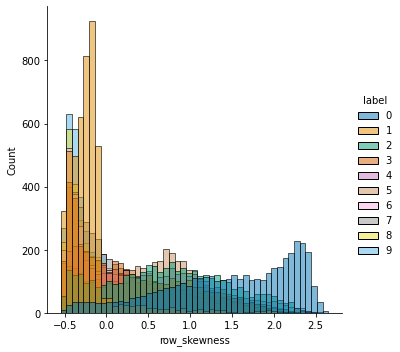

In [53]:
sns.displot(new_data, x="row_skewness", hue="label", palette="colorblind")

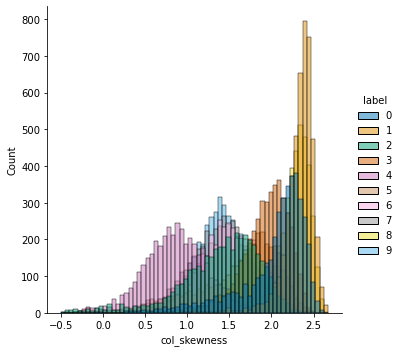

In [56]:
sns.displot(new_data, x="col_skewness", hue="label", palette="colorblind")

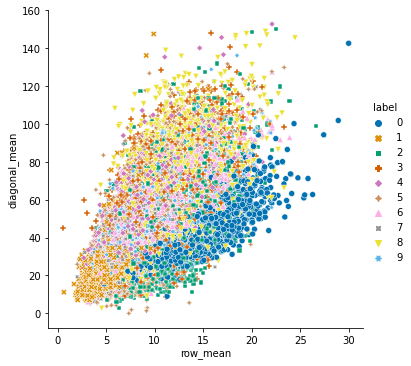

In [54]:
sns.relplot(data=new_data, x="row_mean", y= "diagonal_mean", hue="label", style="label", palette="colorblind")

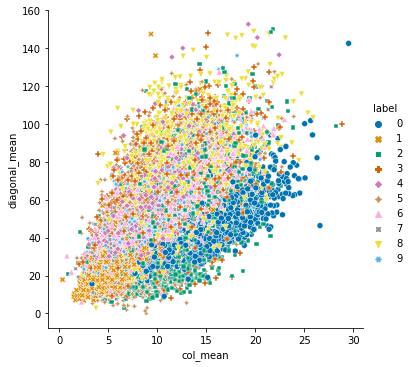

In [55]:
sns.relplot(data=new_data, x="col_mean", y= "diagonal_mean", hue="label", style="label", palette="colorblind")